## linear regresion

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### loading data

In [2]:
data = pd.read_csv("data_for_lr.csv")

In [3]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [7]:
data.isnull().sum()

x    0
y    1
dtype: int64

### data preprocessing

In [17]:
data=data.dropna()
data.shape

(699, 2)

### splitting data

In [23]:
# training input and output
train_ip = np.array(data.x[0:500]).reshape(500,1)
train_op = np.array(data.y[0:500]).reshape(500,1)
# validate data ip and op or testing data
test_ip = np.array(data.x[500:699]).reshape(199,1)
test_op = np.array(data.y[500:699]).reshape(199,1)

# linear regression
## forward propagation
f(x) =m*x +c

In [31]:
def forward_propagation(train_ip , parameters):
    m = parameters["m"]
    c = parameters["c"]

    predictions = np.multiply(m , train_ip) +c
    return predictions

    

## cost function
summation(1/2n * ( y - f(x))^2)

In [32]:
def cost_function(train_op , prediction):
    cost = np.mean((train_op - prediction)**2)*0.5
    return cost

## gradient descent for backpropagation
df = summ(f(x) -y)/n
dm = df * x
dc = df *1

In [41]:
def backward_propagation(train_ip , train_op , predictions):
    derivatives = dict()
    df = predictions - train_op
    dm = np.mean(np.multiply(df , train_ip))
    dc = np.mean(df)

    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

## update parameters

 m = m - (lr * dm)
 c = c - (lr *dc)

In [34]:
def update_parameters(parameters , derivatives  , lr):
    parameters["m"] = parameters["m"] - lr * derivatives["dm"]
    parameters["c"] = parameters["c"] - lr * derivatives["dc"]
    return parameters

## model training

In [44]:
def train(train_ip , train_op ,lr , iters):
    
    # random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)
    
    plt.figure()

    #loss
    loss = list()

    # iterations
    for i in range(iters):

        #forwar propagation
        predictions = forward_propagation(train_ip , parameters)

        # cost
        cost = cost_function(predictions , train_op)

        loss.append(cost)

        print(f"iteration - {i+1} , loss - {cost}")

        #Plot
        fig , ax = plt.subplots()
        ax.plot(train_ip , train_op , "+" , label = "Original")
        ax.plot(train_ip , predictions , "*" , label = "Prediction")
        legends = ax.legend()
        plt.plot(train_ip , train_op , "+" , label = "Original")
        plt.plot(train_ip , predictions , "*" , label = "Prediction")
        plt.show()
        #backpropagation
        derivatives = backward_propagation(train_ip , train_op , predictions)
        #updating parameters
        parameters = update_parameters(parameters , derivatives , lr)

    return parameters , loss    

        

iteration - 1 , loss - 99.10214150583232


<Figure size 640x480 with 0 Axes>

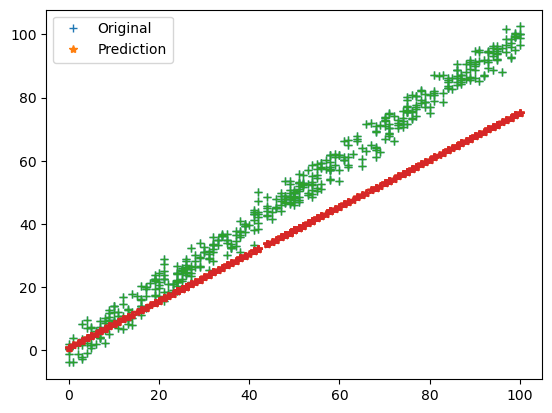

iteration - 2 , loss - 47.18426362671634


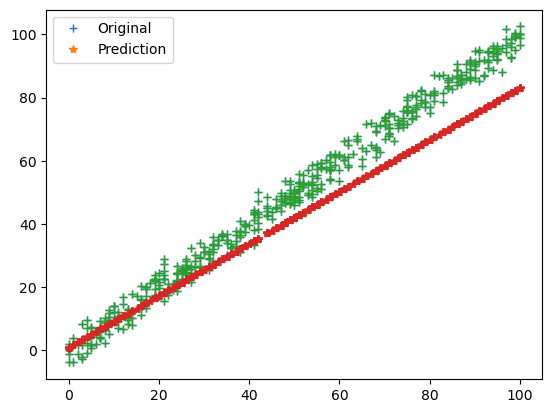

iteration - 3 , loss - 23.629060630403664


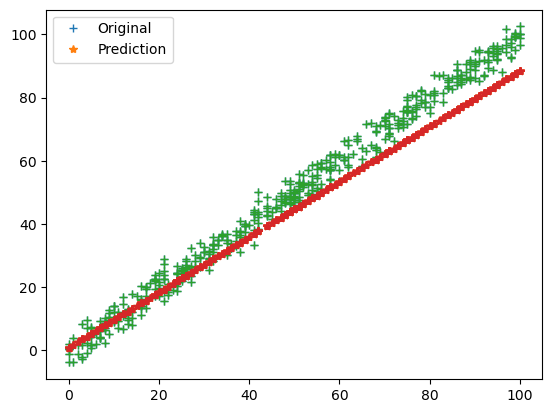

iteration - 4 , loss - 12.942034644302863


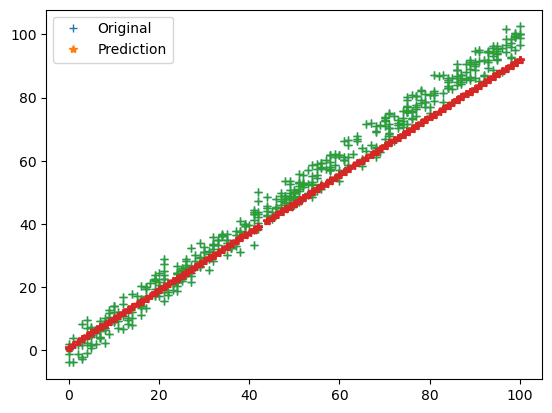

iteration - 5 , loss - 8.093314821274781


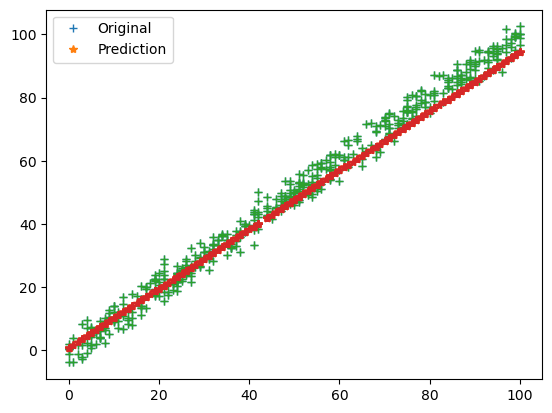

iteration - 6 , loss - 5.893440971397742


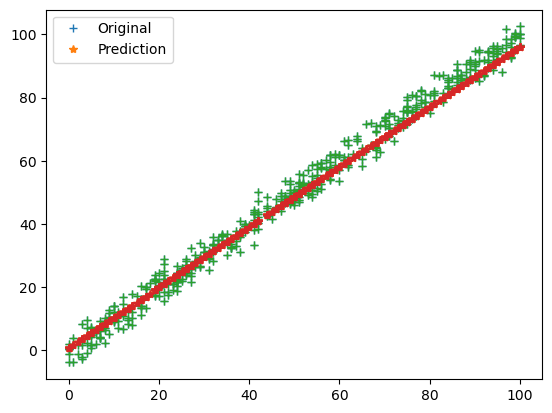

iteration - 7 , loss - 4.895351473726652


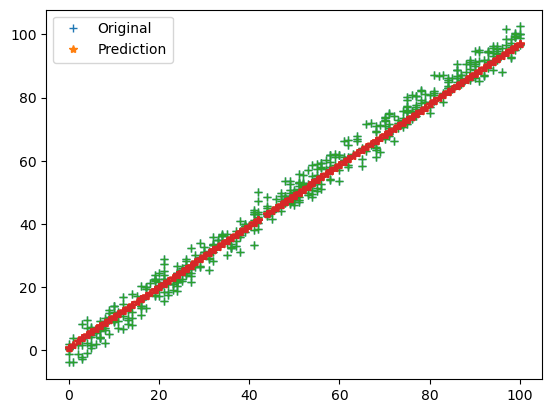

iteration - 8 , loss - 4.442512868013669


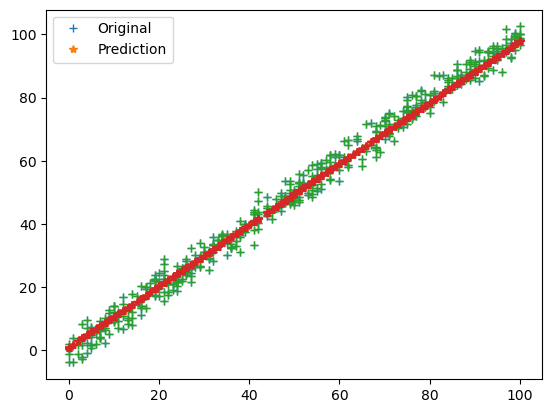

iteration - 9 , loss - 4.237055196140782


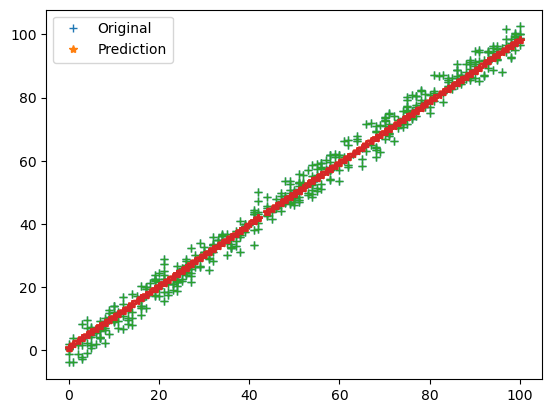

iteration - 10 , loss - 4.143834528176823


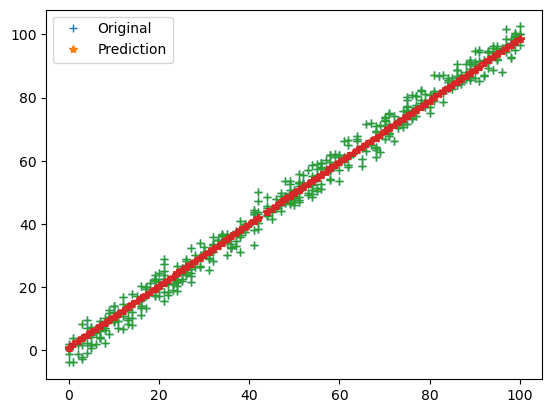

iteration - 11 , loss - 4.101535913421007


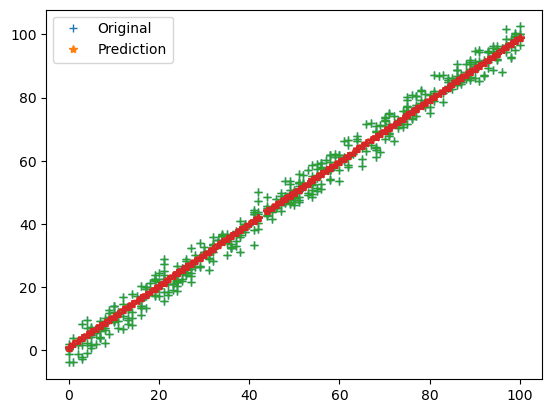

iteration - 12 , loss - 4.082340690825417


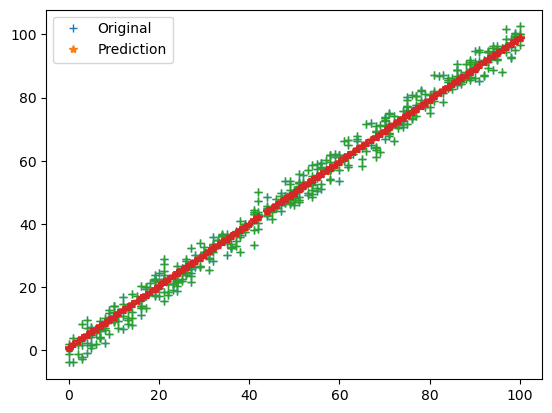

iteration - 13 , loss - 4.073627503059503


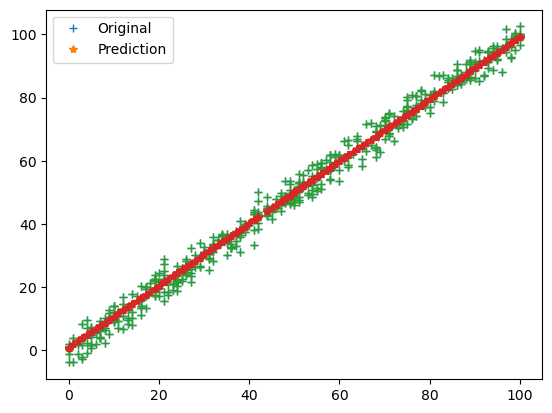

iteration - 14 , loss - 4.069670026322455


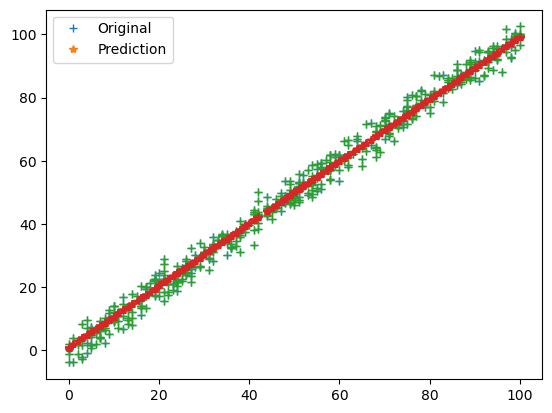

iteration - 15 , loss - 4.067870221163115


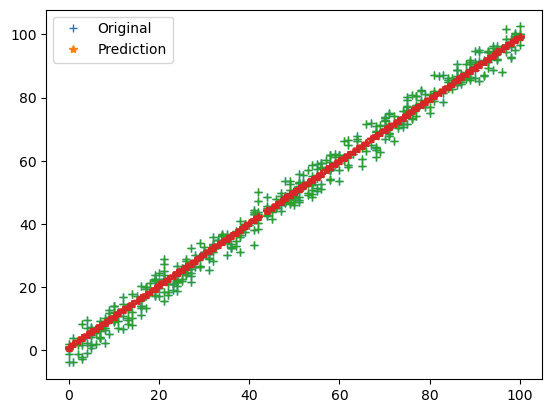

iteration - 16 , loss - 4.06704935420479


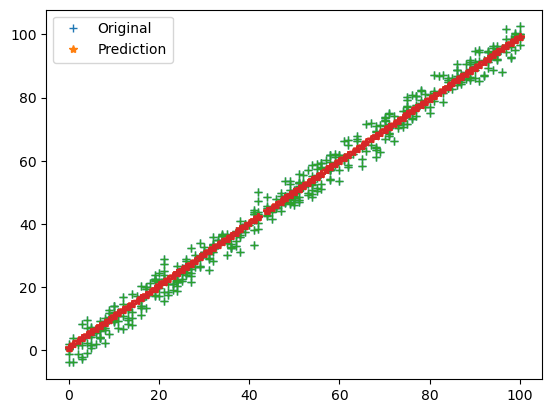

iteration - 17 , loss - 4.066672632808847


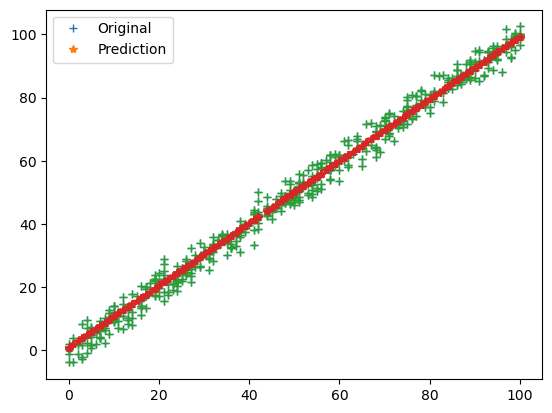

iteration - 18 , loss - 4.066497420962772


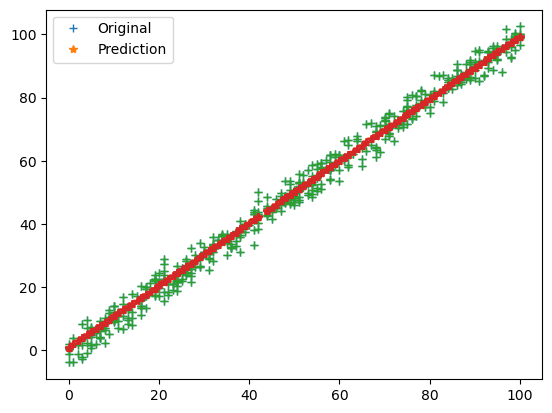

iteration - 19 , loss - 4.0664136344389235


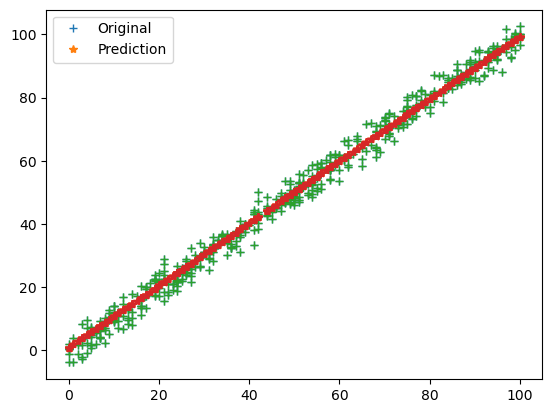

iteration - 20 , loss - 4.066371327901271


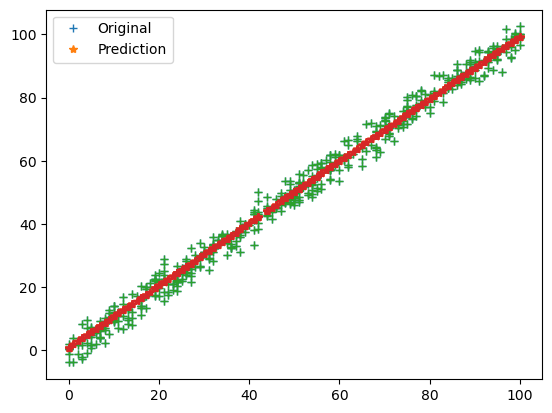

In [45]:
parameters , loss = train(train_ip , train_op , 0.0001 , 20)

In [46]:
print(parameters)

{'m': 0.9840614261001802, 'c': 0.8767306591623569}


In [47]:
loss

[99.10214150583232,
 47.18426362671634,
 23.629060630403664,
 12.942034644302863,
 8.093314821274781,
 5.893440971397742,
 4.895351473726652,
 4.442512868013669,
 4.237055196140782,
 4.143834528176823,
 4.101535913421007,
 4.082340690825417,
 4.073627503059503,
 4.069670026322455,
 4.067870221163115,
 4.06704935420479,
 4.066672632808847,
 4.066497420962772,
 4.0664136344389235,
 4.066371327901271]

## prediction

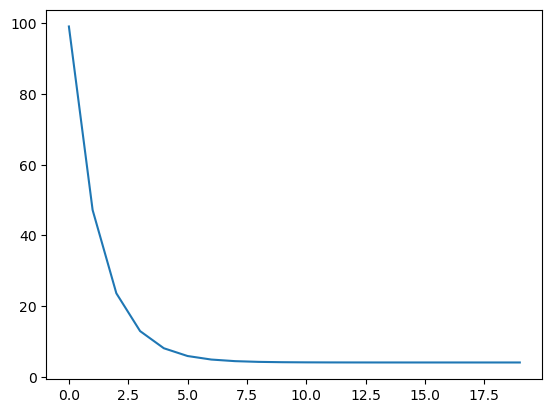

In [48]:
plt.plot(loss)

In [50]:
test_predictions = test_ip * parameters["m"] + parameters["c"]


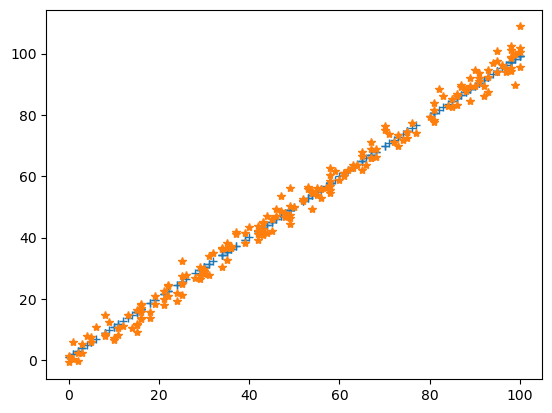

In [51]:
plt.plot(test_ip , test_predictions , "+")
plt.plot(test_ip , test_op , "*")
plt.show()

In [55]:
cost_function(test_op , test_predictions)

4.047601338580103

# using library

### training model

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr_model = LinearRegression()

In [58]:
lr_model.fit(train_ip , train_op)

LinearRegression()

In [59]:
lr_model.coef_

array([[1.0009993]])

In [60]:
lr_model.intercept_

array([-0.23603461])

### prediction

In [61]:
test_prediction  = lr_model.predict(test_ip)

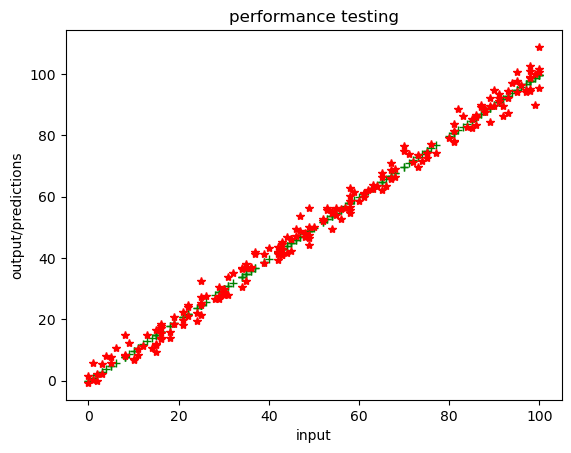

In [63]:
plt.plot(test_ip ,test_prediction , "+" , color = "green")
plt.plot(test_ip , test_op , "*" , color = "red")
plt.title("performance testing")
plt.xlabel("input")
plt.ylabel("output/predictions")
plt.show()

In [64]:
#cost
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(test_op , test_prediction)
cost

8.030031591835371